In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gamma, norm

%matplotlib inline

Сгенерировать выборку объёма 1000 из гаммы-распределения (a= 1.9)

In [31]:
a = 1.9
sample = gamma.rvs(a,  size=1000)   

 Гистограмма выборки и поверх неё теоретическую плотность распределения случайной величины:

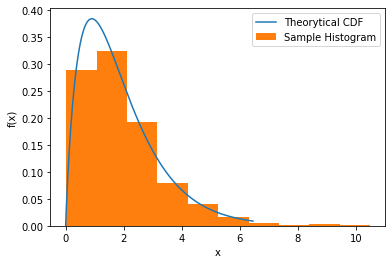

In [32]:
x = np.linspace(0, gamma.ppf(0.99, a), 1000)
plt.plot(x, gamma.pdf(x, a), label='Theorytical PDF')
plt.hist(sample, density=True, label='Sample Histogram')
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и построим гистограммы распределений их выборочных средних:
Для гаммы-распределения: EX = a, DX = a. 
Cоответсвенно $$p = N(EX, \sqrt{\frac{DX}{n}}) = N(a, \sqrt{\frac{a}{n}})$$

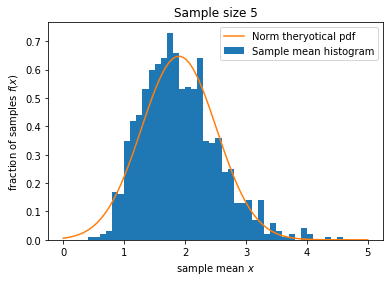

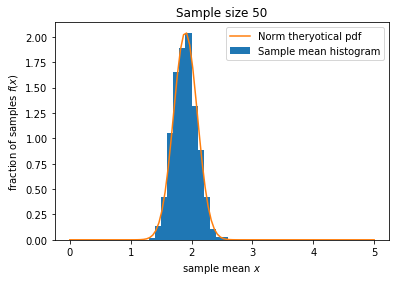

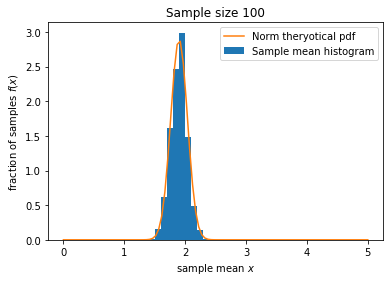

In [40]:
#выборка размера n
for n in [5, 50, 100]:
    sample_mean = []
    # вычисляется сдеднее из 1000 выборок
    for rv in range(1000):
        sample_mean.append(gamma.rvs(a,  size=n).mean())
    #построим гистограммы распределений их выборочных средних
    plt.hist(sample_mean, bins= 50,  density=True, range=[0,5], label='Sample mean histogram')
    # вычисляется pdf нормального распределения с данными параметрами
    norm_rv = norm(a, np.sqrt(a/n))
    x = np.linspace(0, 5, 100)
    plt.plot(x, norm_rv.pdf(x), label='Norm theryotical pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

При увеличении размера выборки n, распределение средних значений начинает сходиться к 1.9, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет.

При этом расчетное нормальное распределение более менее совпадает с гистограммой, согласно закону больших чисел.